# 합성곱 신경망(Convolution Neural Network)을 사용한 이미지 분류

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST 데이터 불러오기

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

## 2차원 합성곱의 개념
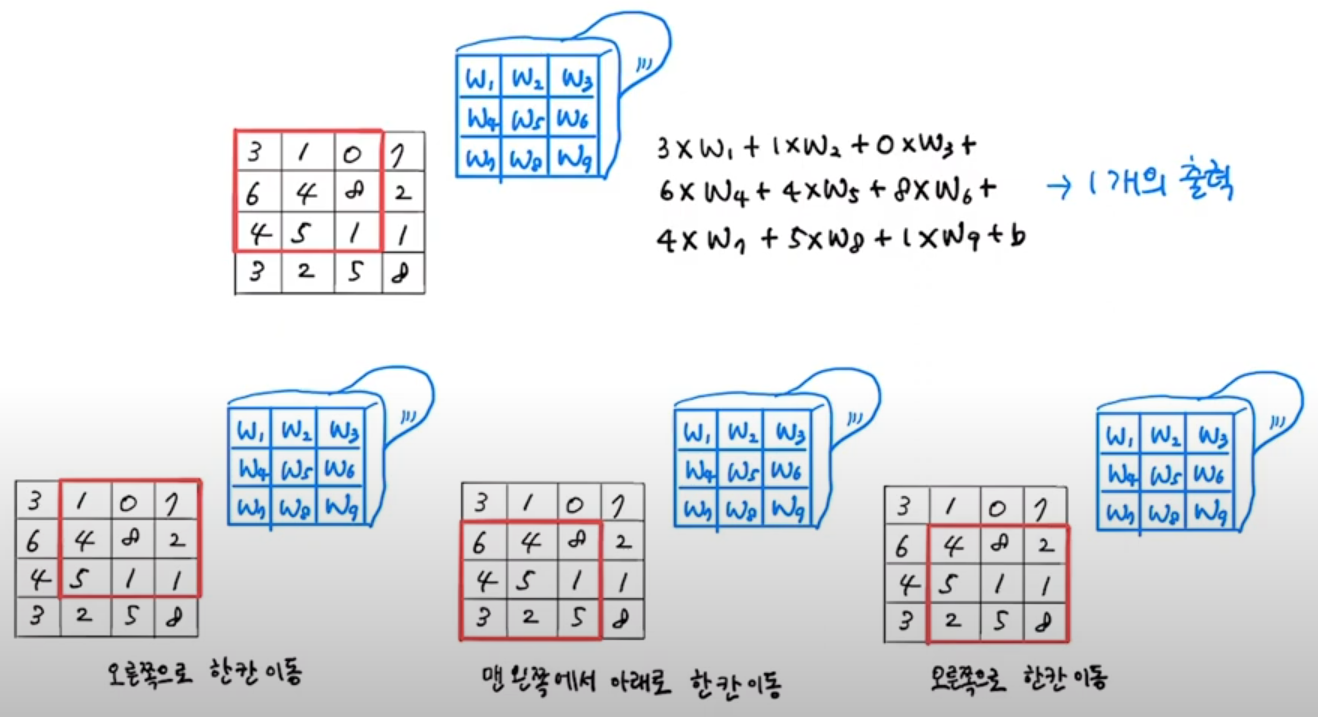

* 이미지를 1차원으로 해석하지 않고 2차원 그대로 사용
* 픽셀별로 가중치를 업데이트 하지 않고 커널(필터)를 적용하여 하나의 출력으로 해석
* 좌상단부터 우하단까시 순서대로 스트라이딩(슬라이딩, 이동)함, strides 기본값은 1이며 일반적으로 1칸씩 이동함
* 커널(필터)는 보통 3 x 3, 5 x 5를 권장

## 특성 맵

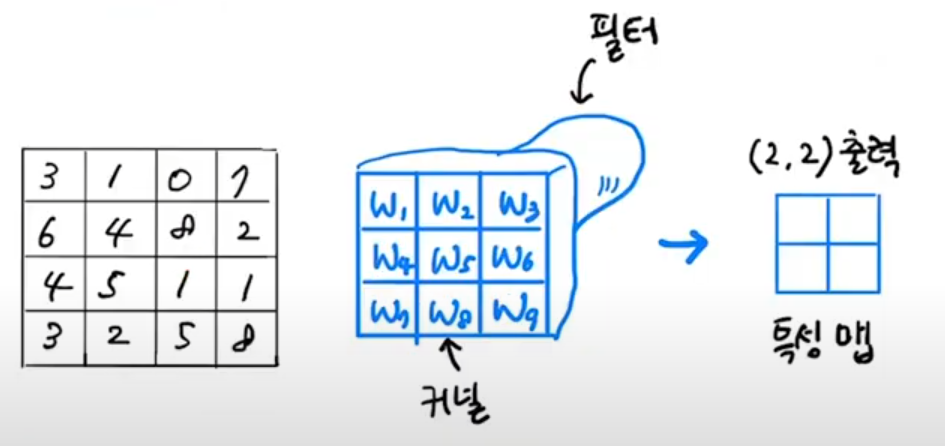

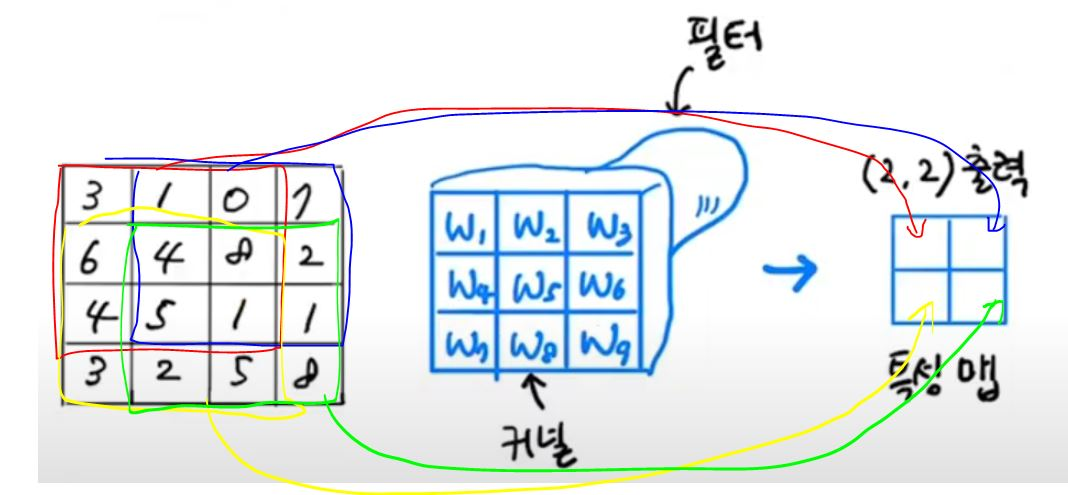

## 여러 개의 필터
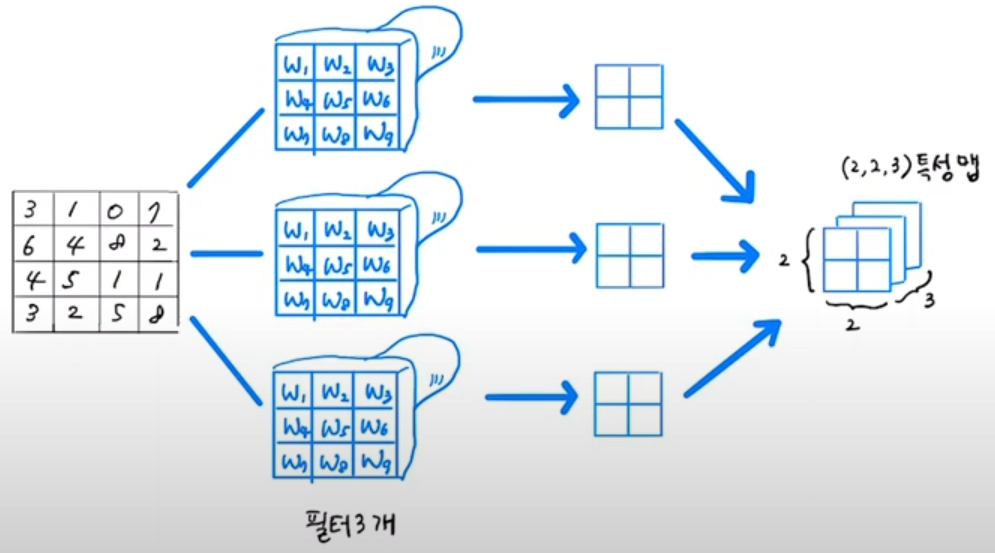

## 패딩
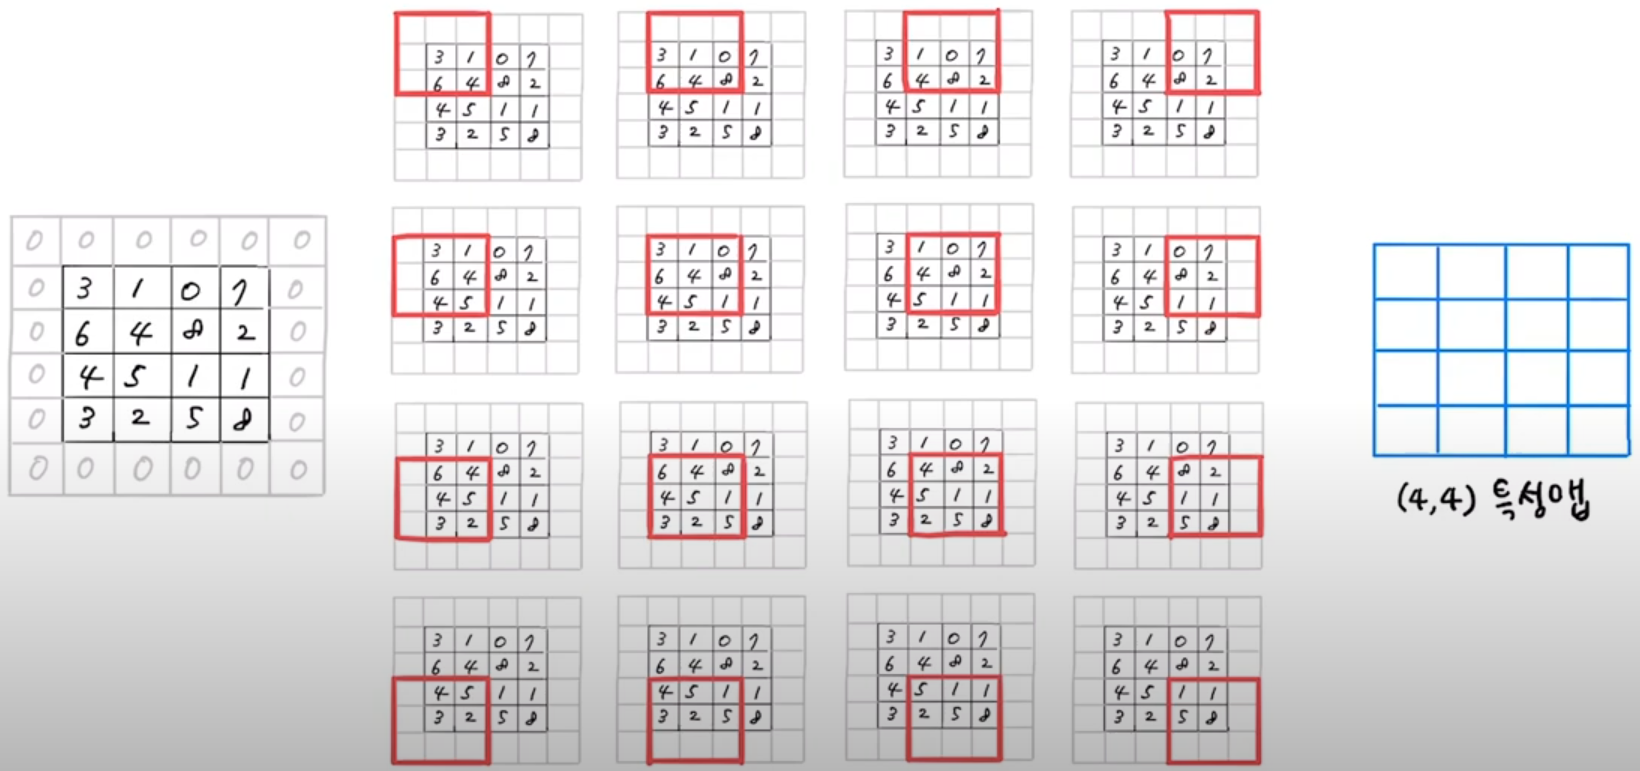

* 패딩을 붙여 슬라이딩(이동) 횟수를 늘려 모서리 경계지역 부분에 더 많은 학습을 할 수 있음
* 패딩값을 0으로 세팅하여 연산을 할 때 영향을 미치지 않는다.
* 입력과 특성맵의 사이즈가 같은 패딩방식을 특별히 same padding이라고 함 (일반적으로 사용되는 옵션)

## 풀링
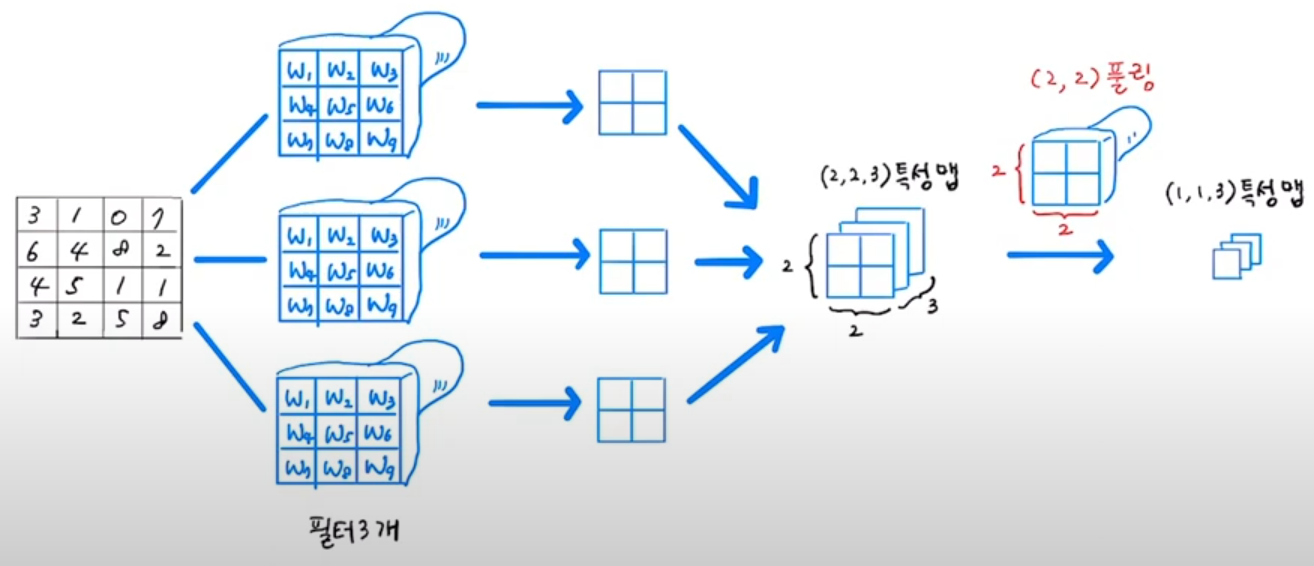

* 특성맵을 더 단순화 시키는 역할을 수행함
* 풀링 방식
 - 평균 풀링: 평균값으로 선택
 - 최대 풀링: 최대값으로 선택

### 최대 풀링
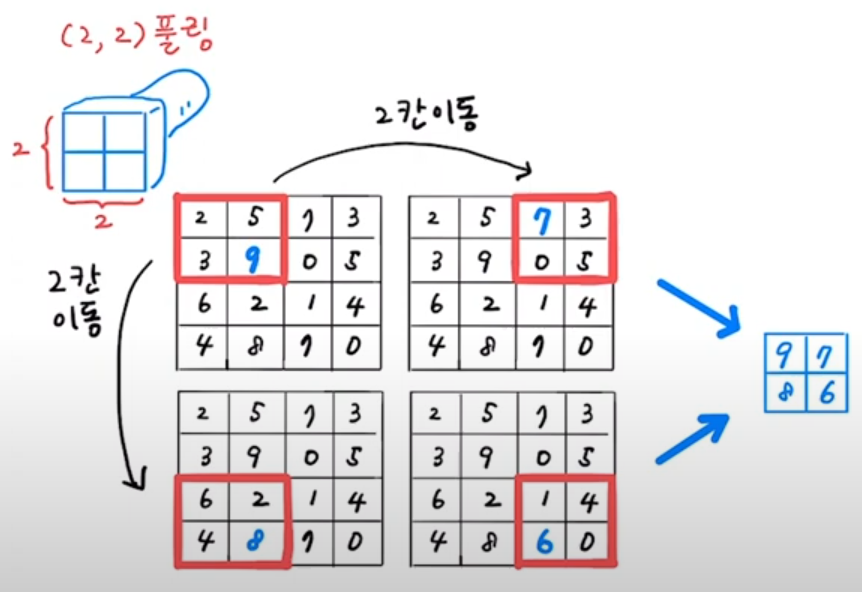

* 이미지의 사이즈를 줄이는 용도이기 때문에 겹치지 않게 슬라이딩한다.

## 합성곱 신경망
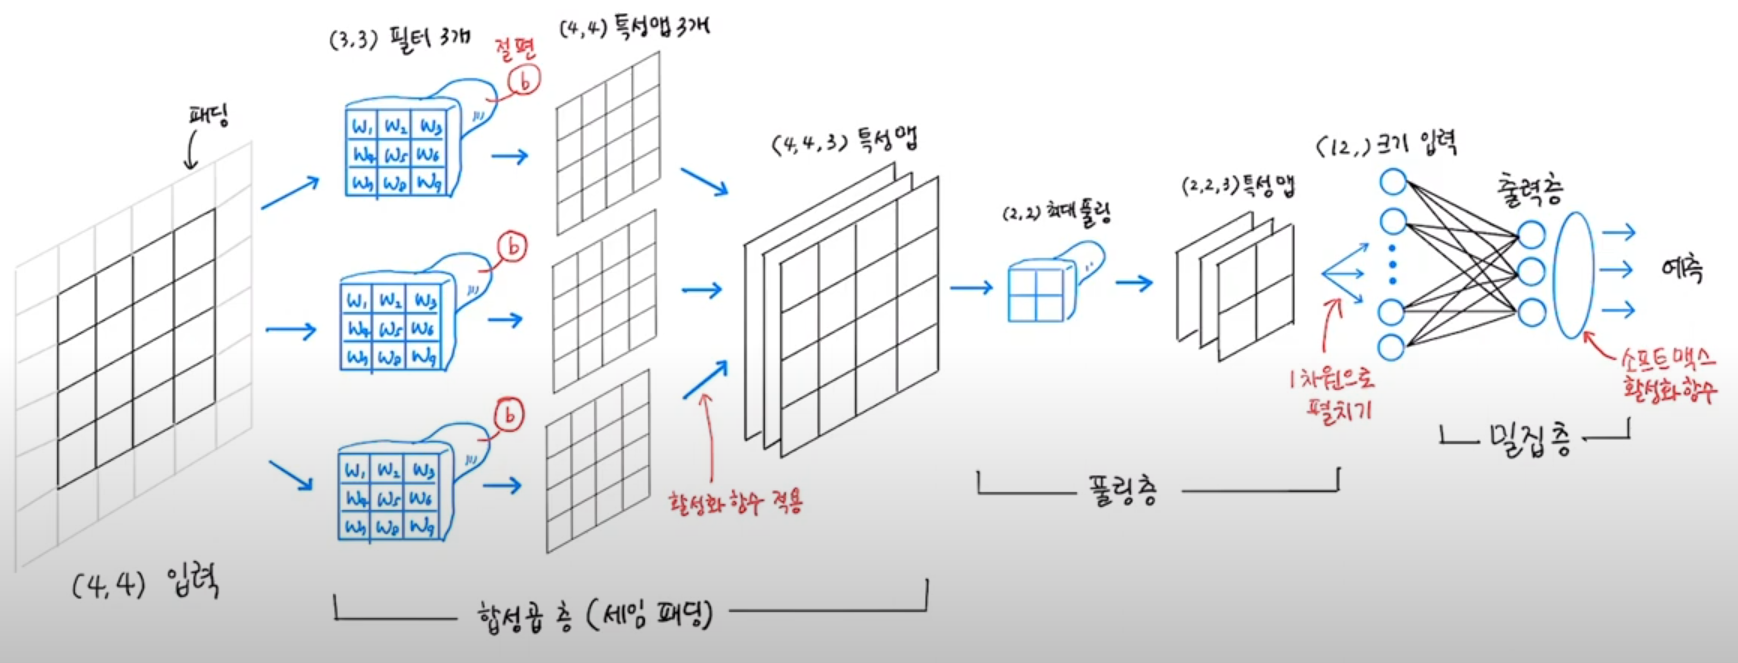

## 합성곱 신경망 만들기

In [3]:
model = keras.Sequential()

In [4]:
# Conv2D(32 => 필터개수, kernel_size=3, activation='relu', 
#                              padding='same', input_shape=(28,28,1))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))

In [5]:
model.add(keras.layers.MaxPooling2D(2)) # 2 => 2*2 사이즈의 풀링을 적용한다라는 의미

In [6]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [9]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## 모델 컴파일과 훈련

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 34s 22ms/step - loss: 0.5086 - accuracy: 0.8177 - val_loss: 0.3203 - val_accuracy: 0.8808
Epoch 2/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.3374 - accuracy: 0.8791 - val_loss: 0.2740 - val_accuracy: 0.8948
Epoch 3/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2906 - accuracy: 0.8968 - val_loss: 0.2505 - val_accuracy: 0.9077
Epoch 4/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2567 - accuracy: 0.9078 - val_loss: 0.2330 - val_accuracy: 0.9128
Epoch 5/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2341 - accuracy: 0.9148 - val_loss: 0.2355 - val_accuracy: 0.9120
Epoch 6/20
1500/1500 [==============================] - 37s 25ms/step - loss: 0.2148 - accuracy: 0.9207 - val_loss: 0.2172 - val_accuracy: 0.9193
Epoch 7/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.1984 - accuracy: 0.9270 - val_loss: 0.2106 -

In [12]:
import matplotlib.pyplot as plt

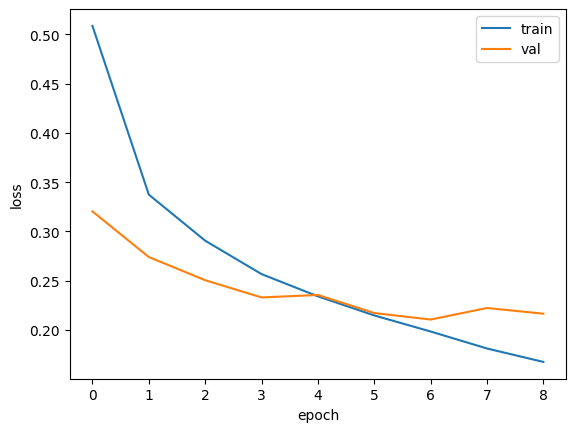

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2106 - accuracy: 0.9251


[0.2105831503868103, 0.925083339214325]

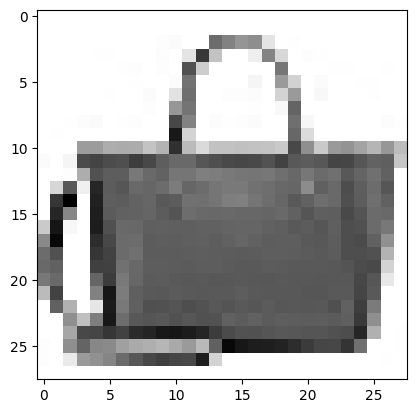

In [15]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [16]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 101ms/step
[[8.5330846e-16 2.0566846e-24 1.0128896e-20 4.1127954e-18 4.4097624e-17
  5.0530847e-15 1.5271696e-15 8.3685141e-17 1.0000000e+00 3.0487442e-17]]


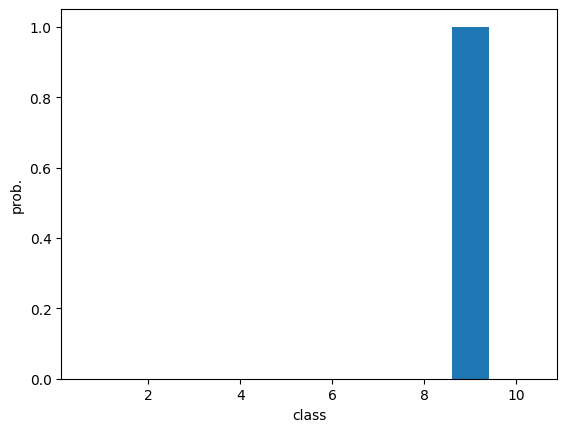

In [17]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [18]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [19]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [20]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [21]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2347 - accuracy: 0.9161


[0.2347012162208557, 0.916100025177002]